In [1]:
from psikit import Psikit
pk = pk=Psikit(debug=True,threads=1,memory=12)
pk.read_from_smiles("c1ccccc1")
print("SCF Energy: ", pk.energy())
print("HOMO: ", pk.HOMO)
print("LUMO: ", pk.LUMO)
x, y, z, total = pk.dipolemoment
print("SCF Total Dipole Moment: {}".format(total))
# SCF Energy:  -230.712279648862
# HOMO:  -0.32848562009092513
# LUMO:  0.1456515222506689
# SCF Total Dipole Moment: 3.292464934070545e-05


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.
SCF Energy:  -230.71227965267587
HOMO:  -0.32848520376992946
LUMO:  0.14565220772826254
SCF Total Dipole Moment: 0.0


In [2]:
pk = Psikit()
pk.read_from_smiles("c1ccccc1")
print("Optimized SCF Energy: ", pk.optimize())
# Optimizer: Optimization complete!
# Optimized SCF Energy:  -230.71352354223438

Optimizer: Optimization complete!
Optimized SCF Energy:  -230.71352354209034


In [3]:
# REF http://ambermd.org/tutorials/advanced/tutorial1/files/resp_paper_jacs.pdf
pk = Psikit()
pk.read_from_smiles("CC(=O)O")
pk.optimize()
# Optimizer: Optimization complete!
# -227.82180859253418
pk.calc_resp_charges()
# array([-0.32506898,  0.83672649, -0.61924915, -0.66135715,  0.10450057,
#    0.10478188,  0.10780051,  0.45186584])

for atom in pk.mol.GetAtoms(): 
    print(atom.GetSymbol(), "ESP:{}\tRESP:{}".format(atom.GetProp("EP"), atom.GetProp("RESP"))) 

# C ESP:-0.49662019588648315	RESP:-0.3250689814483399
# C ESP:0.91473263536048643		RESP:0.83672648554100837
# O ESP:-0.63823808477114718	RESP:-0.61924915363703359
# O ESP:-0.6763331997116846		RESP:-0.66135714989354499
# H ESP:0.14625849864628995		RESP:0.10450056830656008
# H ESP:0.14578513969681847		RESP:0.10478187811883517
# H ESP:0.1530843954112609		RESP:0.1078005104750676
# H ESP:0.45133081125445906		RESP:0.45186584253744722

### Compute Mulliken charges and Lowdin charges

pk = Psikit()
pk.read_from_smiles("CC(=O)O")
pk.optimize() # or pk.energy()

pk.calc_mulliken_charges()
# array([-0.42203029,  0.72794785, -0.55419051, -0.59333358,  0.16369722,
#    0.1636994 ,  0.15462075,  0.35958916])

pk.calc_lowdin_charges()
#array([-0.30006577,  0.33900448, -0.35983788, -0.28463832,  0.12439944,
#    0.12810672,  0.11935266,  0.23367866])

Optimizer: Optimization complete!
C ESP:-0.28288262382835394	RESP:-0.26657465323386642
C ESP:0.80609513982092829	RESP:0.8060951398209284
O ESP:-0.60321681417437722	RESP:-0.60321681417437722
O ESP:-0.66462635925758373	RESP:-0.66462635925758384
H ESP:0.09666369304240531	RESP:0.091227702844242795
H ESP:0.09666369304240531	RESP:0.091227702844242795
H ESP:0.09666369304240531	RESP:0.091227702844242795
H ESP:0.45463957831217067	RESP:0.45463957831217078
Optimizer: Optimization complete!


array([-0.29413439,  0.33178749, -0.34961791, -0.29234543,  0.12067824,
        0.12156136,  0.12482943,  0.23724122])

In [4]:
from psikit import Psikit

# Initialize Psikit with debugging and set resources
pk = Psikit(debug=True, threads=1, memory=12)

# Load benzene (SMILES format) and optimize geometry
pk.read_from_smiles("c1ccccc1")
pk.optimize(basis_sets="scf/sto-3g")

# Ensure PyMOL RPC server is running before executing this
try:
    pk.view_on_pymol()  # Visualize on PyMOL
except Exception as e:
    print(f"Error: {e}")
    print("Ensure PyMOL is running with 'pymol -R'")

Optimizer: Optimization complete!
Error: ÿ       
Ensure PyMOL is running with 'pymol -R'


The Pymol is not available, and the rest of the code cannot run under this environment. Instead, I tried to visualize it using VMD. 

Optimizer: Optimization complete!


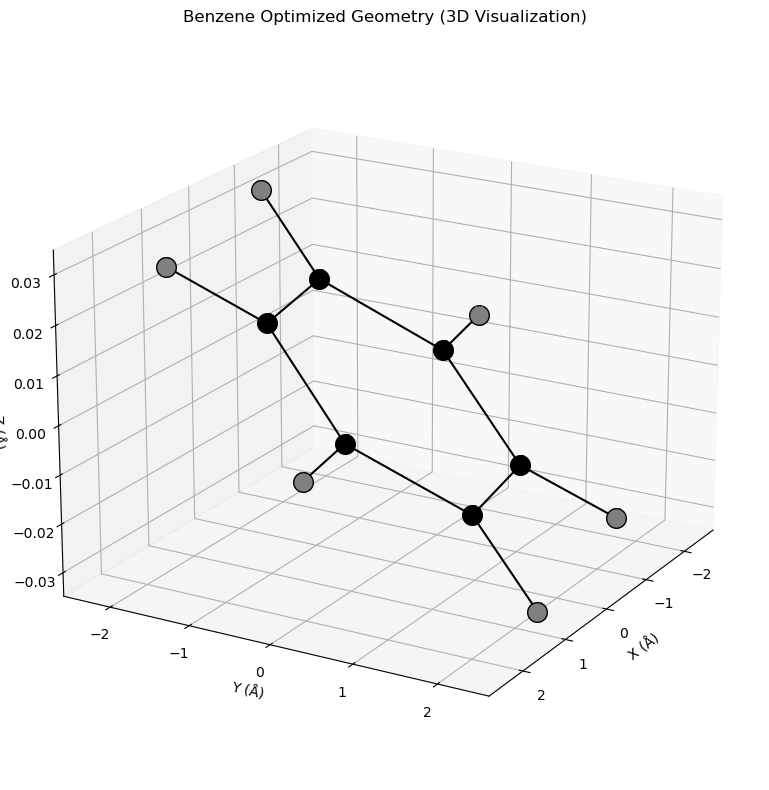

In [5]:
from psikit import Psikit
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Initialize Psikit with debugging options
pk = Psikit(debug=True, threads=1, memory=12)

# Load benzene from SMILES and optimize geometry
pk.read_from_smiles("c1ccccc1")  # Benzene SMILES
pk.optimize(basis_sets="scf/sto-3g")  # Optimize geometry

# Visualize the molecule directly in Python
# Extract RDKit molecule object from Psikit
mol = pk.mol

# Ensure 3D coordinates are embedded
AllChem.EmbedMolecule(mol, randomSeed=42)  # Add 3D coordinates if not present

# Get atom positions
conf = mol.GetConformer()
positions = [conf.GetAtomPosition(i) for i in range(mol.GetNumAtoms())]
x, y, z = zip(*[(p.x, p.y, p.z) for p in positions])

# Get atom types (for color-coding)
atom_types = [atom.GetSymbol() for atom in mol.GetAtoms()]
colors = {"H": "gray", "C": "black"}  # Add more atom types as needed
atom_colors = [colors.get(atom, "blue") for atom in atom_types]  # Default to blue if unknown

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot for atoms
for i, (xi, yi, zi, color) in enumerate(zip(x, y, z, atom_colors)):
    ax.scatter(xi, yi, zi, c=color, s=200, edgecolors="k", depthshade=True)
    ax.text(xi, yi, zi, f"{atom_types[i]}", fontsize=10, ha="center", color=color)

# Draw bonds between atoms
for bond in mol.GetBonds():
    start = bond.GetBeginAtomIdx()
    end = bond.GetEndAtomIdx()
    ax.plot(
        [x[start], x[end]],
        [y[start], y[end]],
        [z[start], z[end]],
        c="k",  # Bond color
        linewidth=1.5,
    )

# Customize plot
ax.set_title("Benzene Optimized Geometry (3D Visualization)")
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")

# Adjust view angle and spacing
ax.view_init(elev=20, azim=30)
plt.tight_layout()
plt.show()